# Лабораторная работа № 1
## Вариант 24, Щеглова П.Н.
Массив данных с информацией о постояльцах некоторой гостиницы: ФИО, занимаемый номер, дата приезда, дата отъезда, сумма оплаты проживания (сравнение по полям – дата приезда, занимаемый номер, ФИО)

Сортировки - в, г, е, то есть,  сортировка простыми вставками, шейкер-сортировка, быстрая сортировка

In [2]:
"""@package docstring
In this module class and its methods are created.
"""

import numpy as np


class Guest:
    """class Guest consists of a name, room number, check-in and check-out dates in April 2020 
    and amount to pay of the guest in the hotel.
 
    There are methods to create, compare and represent the Guests.
    """
    def __init__(self, Name, room, check_in, check_out, amount):
        """The constructor."""
        self.Name = Name
        self.room = room
        self.check_in = check_in
        self.check_out = check_out
        self.amount = amount
        
    def __lt__(self, other): 
        """Comparing Guests by check-in date, room number and name. Operator <"""
        if [self.check_in, self.room, self.Name] < [other.check_in, other.room, other.Name]:
            return True
        return False
    def __gt__(self, other): 
        """Comparing Guests by check-in date, room number and name. Operator <"""
        if [self.check_in, self.room, self.Name] > [other.check_in, other.room, other.Name]:
            return True
        return False
    def __le__(self, other): 
        """Comparing Guests by check-in date, room number and name. Operator <="""
        if [self.check_in, self.room, self.Name] <= [other.check_in, other.room, other.Name]:
            return True
        return False
    def __ge__(self, other): 
        """Comparing Guests by check-in date, room number and name. Operator >="""
        if [self.check_in, self.room, self.Name] >= [other.check_in, other.room, other.Name]:
            return True
        return False
                    
    def __repr__(self):
        """The representer."""
        return "Guest {i} stays in room #{j} from {k} to {l} April\n".format(i=self.Name,
                                                                            j=self.room,
                                                                            k=self.check_in,
                                                                            l=self.check_out)


In [3]:
"""@package docstring
In this module data is imported from txt-files and saved in series of class Guest.
"""
import pandas as pd

list1 = pd.read_csv('list 1.txt', header = None, sep='\t')
list2 = pd.read_csv('list 2.txt', header = None, sep='\t')
list3 = pd.read_csv('list 3.txt', header = None, sep='\t')
list4 = pd.read_csv('list 4.txt', header = None, sep='\t')
list5 = pd.read_csv('list 5.txt', header = None, sep='\t')
list6 = pd.read_csv('list 6.txt', header = None, sep='\t')
list7 = pd.read_csv('list 7.txt', header = None, sep='\t')
list8 = pd.read_csv('list 8.txt', header = None, sep='\t')

def to_Guest (df_list):
    """Function provides the conversion from pandas.DataFrame dtype=string to pandas.Series dtype=object.Guest."""
    list_guest = pd.Series(np.empty((len(df_list))))
    for i in range(len(df_list)):
        Name = df_list[0][i]
        room = int(df_list[1][i])
        check_in = int(df_list[2][i])
        check_out = int(df_list[3][i])
        amount = int(df_list[4][i])
        list_guest.iloc[[i]] = Guest(Name, room, check_in, check_out, amount)
    return list_guest

list1_guest = to_Guest (list1)
list2_guest = to_Guest (list2)
list3_guest = to_Guest (list3)
list4_guest = to_Guest (list4)
list5_guest = to_Guest (list5)
list6_guest = to_Guest (list6)
list7_guest = to_Guest (list7)
list8_guest = to_Guest (list8)

In [4]:
"""@package docstring
In this module isertion sorting algorithm is formed as a functional module. Const function.
"""

def insertion_sort(data_to_sort):
    data = data_to_sort
    for i in range(len(data)):
        j = i - 1 
        key = data[i]
        while j >= 0 and data[j] > key:
            data[j + 1] = data[j]
            j -= 1
        data[j + 1] = key
    return data

In [5]:
"""@package docstring
In this module sheker sorting algorithm is formed as a functional module. Const function.
"""

def shaker_sort(data_to_sort):
    data = data_to_sort
    length = len(data) 
    swapped = True
    start_index = 0
    end_index = length - 1
    
    while (swapped == True): 
        
        swapped = False
        # проход слева направо
        for i in range(start_index, end_index): 
            if (data[i] > data[i + 1]) : 
                # обмен элементов
                data[i], data[i + 1] = data[i + 1], data[i] 
                swapped = True
        # если не было обменов прерываем цикл
        if (not(swapped)): 
            break
        swapped = False
        end_index = end_index - 1
  
        #проход справа налево
        for i in range(end_index - 1, start_index - 1, -1): 
            if (data[i] > data[i + 1]): 
                # обмен элементов
                data[i], data[i + 1] = data[i + 1], data[i] 
                swapped = True
        start_index = start_index + 1
    return data

In [10]:
"""@package docstring
In this module quick sorting algorithm is formed as a functional module. Const function.
"""
import random

def quicksort(nums):
    if len(nums) <= 1:
        return nums
    else:
        q = random.choice(nums)
        s_nums = []
        b_nums = []
        e_nums = []
        for n in nums:
            if n < q:
                s_nums.append(n)
            elif n > q:
                b_nums.append(n)
            else:
                e_nums.append(n)
        return quicksort(s_nums) + e_nums + quicksort(b_nums)

In [6]:
%%timeit
insertion_sort(list1_guest)

6.82 ms ± 209 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
%%timeit
shaker_sort(list1_guest)

6.81 ms ± 1.39 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [8]:
%%timeit
quicksort(list1_guest)

1.75 ms ± 11.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [9]:
%%timeit
insertion_sort(list2_guest)

10.5 ms ± 319 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [10]:
%%timeit
shaker_sort(list2_guest)

8.21 ms ± 60.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [11]:
%%timeit
quicksort(list2_guest)

1.68 ms ± 278 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [12]:
%%timeit
insertion_sort(list3_guest)

6.58 ms ± 268 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
%%timeit
shaker_sort(list3_guest)

6 ms ± 1.08 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [14]:
%%timeit
quicksort(list3_guest)

1.73 ms ± 66 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [15]:
%%timeit
insertion_sort(list4_guest)

11.7 ms ± 258 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [16]:
%%timeit
shaker_sort(list4_guest)

9.88 ms ± 1.15 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [17]:
%%timeit
quicksort(list4_guest)

2.12 ms ± 45.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [18]:
%%timeit
insertion_sort(list5_guest)

14.3 ms ± 629 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [19]:
%%timeit
shaker_sort(list5_guest)

12.1 ms ± 1.38 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [20]:
%%timeit
quicksort(list5_guest)

3.28 ms ± 536 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [21]:
%%timeit
insertion_sort(list6_guest)

22.2 ms ± 1.77 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [22]:
%%timeit
shaker_sort(list6_guest)

18.8 ms ± 835 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [23]:
%%timeit
quicksort(list6_guest)

5.04 ms ± 73.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [24]:
%%timeit
insertion_sort(list7_guest)

59.2 ms ± 7.44 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [25]:
%%timeit
shaker_sort(list7_guest)

50.4 ms ± 12 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [26]:
%%timeit
quicksort(list7_guest)

10.1 ms ± 158 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [15]:
%%timeit
insertion_sort(list8_guest)

81.2 ms ± 1.53 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [16]:
%%timeit
shaker_sort(list8_guest)

64.8 ms ± 1.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [11]:
%%timeit
quicksort(list8_guest)

26.2 ms ± 4.62 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


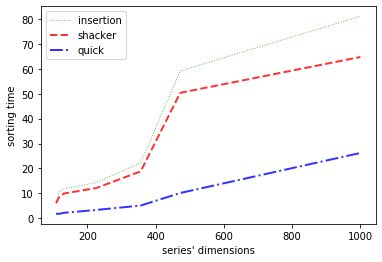

In [17]:
"""@package docstring
In this module graph is created to visualy compare the speed difference between 3 sorting algorithms.
"""
import matplotlib.pyplot as plt
dims = list(map(len, [list3_guest,list1_guest, list2_guest, list4_guest, list5_guest, list6_guest, list7_guest , list8_guest]))
isertion_time = [6.58, 6.82, 10.5, 11.7, 14.3, 22.2, 59.2, 81.2]
shaker_time = [6, 6.81, 8.21, 9.88, 12.1, 18.8, 50.4, 64.8]
quick_time = [1.73, 1.75, 1.68, 2.12, 3.28, 5.04, 10.1, 26.2]
plt.plot(dims, isertion_time, ':g', lw=1, alpha=0.6, label='insertion')
plt.plot(dims, shaker_time, '--r', lw=2, alpha=0.8, label='shacker')
plt.plot(dims, quick_time, '-.b', lw=2, alpha=0.8, label='quick')
plt.legend(loc='upper left', frameon=True)
plt.xlabel('series\' dimensions')
plt.ylabel('sorting time')
plt.show()